<a href="https://colab.research.google.com/github/olatundeO/CE888/blob/main/CE888_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

In [4]:
#this is data on population for city of london for females of all age groups
population_data_female = pd.read_excel("Ethnic-group projections.xlsx", sheet_name = 'Population - Females')

In [6]:
population_data_female.head()

,gss_code,borough,sex,age,ethnic_group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,E09000001,City of London,Female,0,All persons,37,44,34,34,33,42,26,27,29,30,30,31,32,32,33,33,34,34,35,35,36,36,36,36,37,37,37,37,37,37,37,37,37,37,36,36,36,36,35,35
1,E09000001,City of London,Female,1,All persons,34,46,39,33,29,34,36,26,27,28,29,29,30,30,31,32,32,33,33,34,34,34,35,35,35,35,35,35,35,36,36,36,35,35,35,34,34,34,34,34
2,E09000001,City of London,Female,2,All persons,28,35,42,40,37,33,32,35,26,27,28,29,29,30,30,31,31,32,32,33,33,34,34,34,34,35,35,35,35,35,35,35,35,35,34,34,34,34,33,33
3,E09000001,City of London,Female,3,All persons,18,34,36,47,47,40,30,31,34,26,27,27,28,29,29,30,30,31,31,32,32,33,33,33,34,34,34,34,34,34,34,34,34,34,34,33,33,33,33,33
4,E09000001,City of London,Female,4,All persons,21,21,31,38,51,55,38,31,32,33,27,27,28,29,29,30,31,31,31,32,32,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34,33,33,33,33


In [7]:
population_data_female['ethnic_group'].unique()

array(['All persons', 'White British', 'White Irish', 'Other White',
       'White & Black Caribbean', 'White & Black African',
       'White & Asian', 'Other Mixed', 'Indian', 'Pakistani',
       'Bangladeshi', 'Chinese', 'Other Asian', 'Black African',
       'Black Caribbean', 'Other Black', 'Arab', 'Other Ethnic Group',
       'BAME'], dtype=object)

In [8]:
population_data_male = pd.read_excel("Ethnic-group projections.xlsx", sheet_name = "Population - Males")

In [9]:
population_data_male.head()

,gss_code,borough,sex,age,ethnic_group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,E09000001,City of London,Male,0,All persons,32,28,33,32,30,13,29,30,33,34,34,35,36,36,37,37,38,38,39,39,40,40,40,41,41,41,41,41,41,42,42,42,41,41,41,41,40,40,40,40
1,E09000001,City of London,Male,1,All persons,18,23,25,33,37,31,15,28,29,30,31,32,32,33,33,34,35,35,36,36,37,37,37,37,38,38,38,38,38,38,38,38,38,37,37,37,37,36,36,36
2,E09000001,City of London,Male,2,All persons,9,21,27,31,41,32,17,13,20,19,20,21,21,22,23,23,24,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,25,25,25,24,24,24,24,23
3,E09000001,City of London,Male,3,All persons,23,11,19,28,32,38,29,18,14,20,19,20,21,21,22,23,23,24,24,25,25,25,25,26,26,26,26,26,26,26,26,26,25,25,24,24,24,24,24,23
4,E09000001,City of London,Male,4,All persons,13,21,11,17,33,31,36,29,19,16,21,21,21,22,23,23,24,24,25,25,26,26,26,26,27,27,27,27,27,27,27,27,27,26,26,25,25,25,25,25


In [10]:
population_data_male = population_data_male[population_data_male.age != 'All ages']

In [11]:
population_data_male['ethnic_group'].describe()

count             62244
unique               19
top       White British
freq               3276
Name: ethnic_group, dtype: object

In [12]:
population_data_male = population_data_male[population_data_male.ethnic_group != 'All persons']

In [13]:
population_data_male = population_data_male[population_data_male.ethnic_group != 'BAME']

In [14]:
population_data_male = population_data_male.drop(columns = range(2021,2051))

In [15]:
population_data_male.head()

,gss_code,borough,sex,age,ethnic_group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
92,E09000001,City of London,Male,0,White British,15,11,11,9,8,4,7,8,8,9
93,E09000001,City of London,Male,1,White British,10,9,8,9,9,8,3,6,7,7
94,E09000001,City of London,Male,2,White British,3,9,10,9,10,7,4,3,4,4
95,E09000001,City of London,Male,3,White British,9,3,7,9,8,9,6,3,3,4
96,E09000001,City of London,Male,4,White British,3,7,3,5,9,7,8,6,4,3


In [16]:
population_data_male = population_data_male.replace(['Indian','Pakistani','Bangladeshi','Other Asian','Arab'],'Asian or Asian British')
population_data_male = population_data_male.replace(['Black African','Black Caribbean','Other Black'],'Black or Black British')
population_data_male = population_data_male.replace('Chinese','Chinese/Other')
population_data_male = population_data_male.replace(['Other Mixed','White & Black Caribbean','White & Black African','White & Asian'],'Mixed')
population_data_male = population_data_male.replace('Other Ethnic Group','Not Stated')
population_data_male = population_data_male.replace(['White British','Other White','White Irish'],'White')

In [17]:
population_data_male['ethnic_group'].unique()

array(['White', 'Mixed', 'Asian or Asian British', 'Chinese/Other',
       'Black or Black British', 'Not Stated'], dtype=object)

In [19]:
population_data_male = population_data_male.loc[population_data_male['age'] >= 21]
population_data_male['age'].unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90])

In [20]:
population_data_male_2017 = population_data_male.drop([2011,2012,2013,2014,2015,2016,2018,2019,2020], axis=1)
population_data_male_2017.head()

,gss_code,borough,sex,age,ethnic_group,2017
113,E09000001,City of London,Male,21,White,11
114,E09000001,City of London,Male,22,White,11
115,E09000001,City of London,Male,23,White,15
116,E09000001,City of London,Male,24,White,16
117,E09000001,City of London,Male,25,White,22


Text(0.5, 1.0, 'The age distribution of males over the age of 21 in 2017')

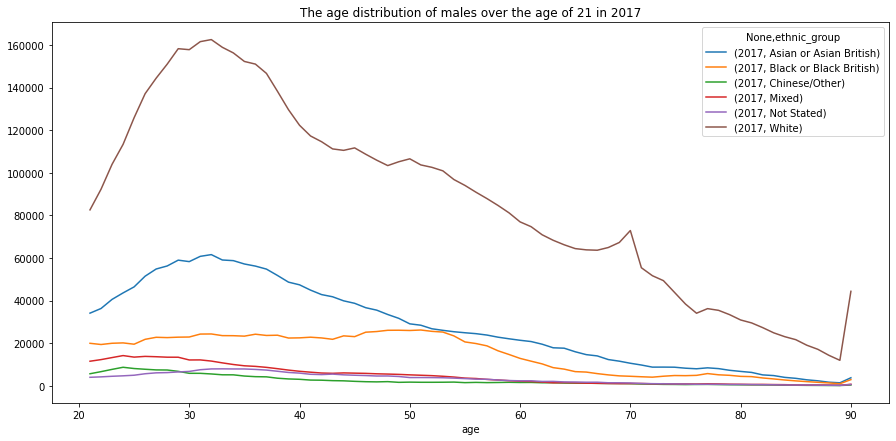

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
population_data_male_2017 = population_data_male_2017.groupby(['age', 'ethnic_group']).agg({2017:'sum'}).unstack().plot(ax=ax)
plt.title("The age distribution of males over the age of 21 in 2017")

In [22]:
population_data_male_2016 = population_data_male.drop([2011,2012,2013,2014,2015,2017,2018,2019,2020], axis=1)
population_data_male_2016.head()

,gss_code,borough,sex,age,ethnic_group,2016
113,E09000001,City of London,Male,21,White,9
114,E09000001,City of London,Male,22,White,12
115,E09000001,City of London,Male,23,White,11
116,E09000001,City of London,Male,24,White,17
117,E09000001,City of London,Male,25,White,13


Text(0.5, 1.0, 'The age distribution of males over the age of 21 in 2016')

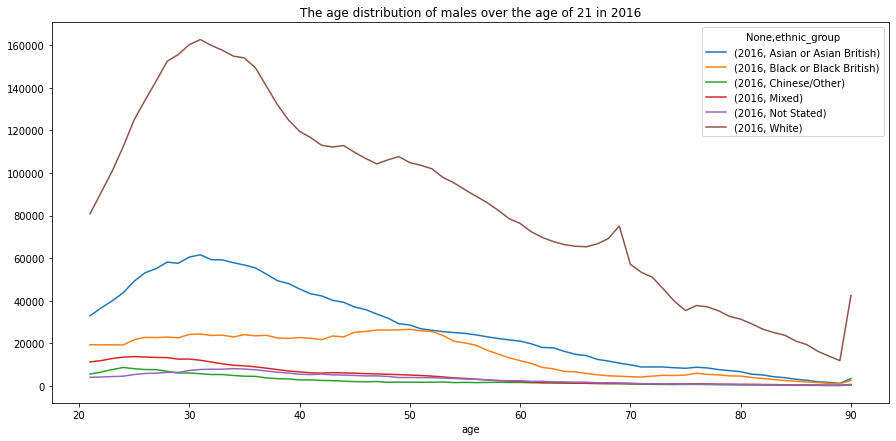

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
population_data_male_2016 = population_data_male_2016.groupby(['age', 'ethnic_group']).agg({2016:'sum'}).unstack().plot(ax=ax)
plt.title("The age distribution of males over the age of 21 in 2016")

In [24]:
population_data_female = population_data_female[population_data_female.age != 'All ages']

In [25]:
population_data_female['ethnic_group'].describe()

count             62244
unique               19
top       White British
freq               3276
Name: ethnic_group, dtype: object

In [26]:
population_data_female = population_data_female[population_data_female.ethnic_group != 'All persons']

In [27]:
population_data_female = population_data_female[population_data_female.ethnic_group != 'BAME']

In [28]:
population_data_female = population_data_female.drop(columns = range(2021,2051))

In [ ]:
population_data_female.head()

,gss_code,borough,sex,age,ethnic_group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
113,E09000001,City of London,Female,21,White British,9,10,4,9,5,12,11,9,10,10
114,E09000001,City of London,Female,22,White British,15,11,10,9,15,11,13,13,13,13
115,E09000001,City of London,Female,23,White British,29,16,11,16,15,21,16,17,17,17
116,E09000001,City of London,Female,24,White British,28,25,16,7,17,17,20,19,19,19
117,E09000001,City of London,Female,25,White British,27,22,16,16,9,18,18,19,19,19


In [31]:
population_data_female['age'].describe()

count     42840
unique       70
top          90
freq        612
Name: age, dtype: int64

In [30]:
population_data_female = population_data_female.loc[population_data_female['age'] >= 21]
population_data_female['age'].unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90], dtype=object)

In [32]:
population_data_female.head()

,gss_code,borough,sex,age,ethnic_group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
113,E09000001,City of London,Female,21,White British,9,10,4,9,5,12,11,9,10,10
114,E09000001,City of London,Female,22,White British,15,11,10,9,15,11,13,13,13,13
115,E09000001,City of London,Female,23,White British,29,16,11,16,15,21,16,17,17,17
116,E09000001,City of London,Female,24,White British,28,25,16,7,17,17,20,19,19,19
117,E09000001,City of London,Female,25,White British,27,22,16,16,9,18,18,19,19,19


In [33]:
population_data_female = population_data_female.replace(['Indian','Pakistani','Bangladeshi','Other Asian','Arab'],'Asian or Asian British')
population_data_female = population_data_female.replace(['Black African','Black Caribbean','Other Black'],'Black or Black British')
population_data_female = population_data_female.replace('Chinese','Chinese/Other')
population_data_female = population_data_female.replace(['Other Mixed','White & Black Caribbean','White & Black African','White & Asian'],'Mixed')
population_data_female = population_data_female.replace('Other Ethnic Group','Not Stated')
population_data_female = population_data_female.replace(['White British','Other White','White Irish'],'White')

In [34]:
population_data_female['ethnic_group'].unique()

array(['White', 'Mixed', 'Asian or Asian British', 'Chinese/Other',
       'Black or Black British', 'Not Stated'], dtype=object)

In [35]:
population_data_female_2017 = population_data_female.drop([2011,2012,2013,2014,2015,2016,2018,2019,2020], axis=1)
population_data_female_2017.head()

,gss_code,borough,sex,age,ethnic_group,2017
113,E09000001,City of London,Female,21,White,11
114,E09000001,City of London,Female,22,White,13
115,E09000001,City of London,Female,23,White,16
116,E09000001,City of London,Female,24,White,20
117,E09000001,City of London,Female,25,White,18


Text(0.5, 1.0, 'The age distribution of females over the age of 21 in 2017')

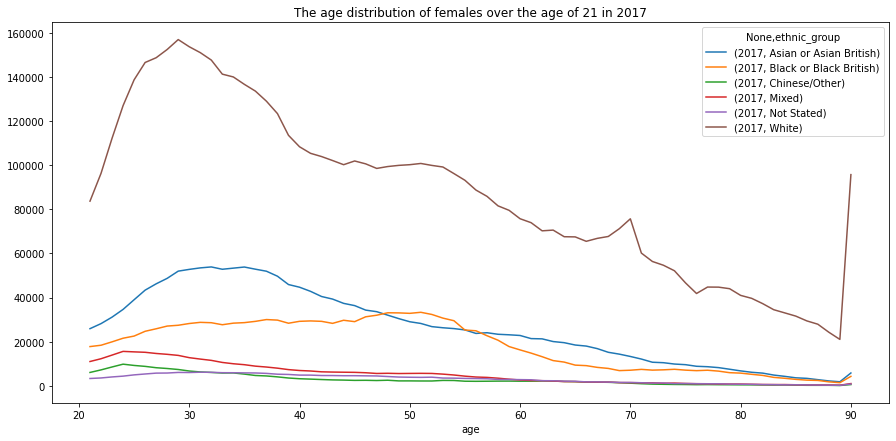

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
population_data_female_2017 = population_data_female_2017.groupby(['age', 'ethnic_group']).agg({2017:'sum'}).unstack().plot(ax=ax)
plt.title("The age distribution of females over the age of 21 in 2017")

In [37]:
population_data_female_2016 = population_data_female.drop([2011,2012,2013,2014,2015,2017,2018,2019,2020], axis=1)
population_data_female_2016.head()

,gss_code,borough,sex,age,ethnic_group,2016
113,E09000001,City of London,Female,21,White,12
114,E09000001,City of London,Female,22,White,11
115,E09000001,City of London,Female,23,White,21
116,E09000001,City of London,Female,24,White,17
117,E09000001,City of London,Female,25,White,18


Text(0.5, 1.0, 'The age distribution of females over the age of 21 in 2016')

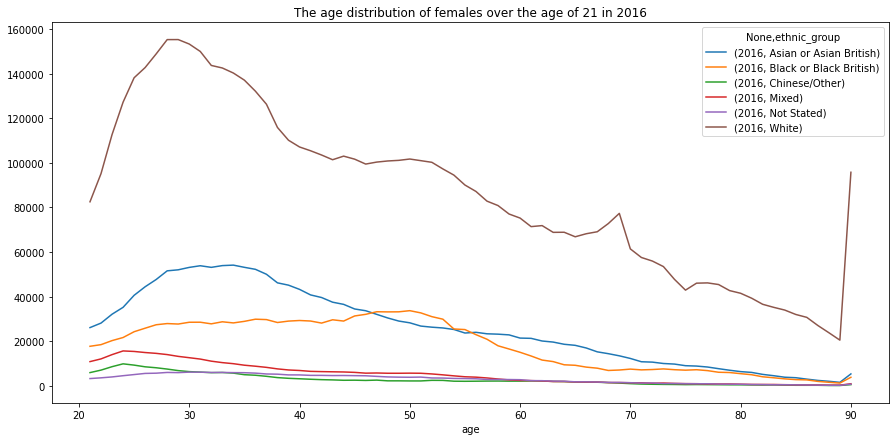

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
population_data_female_2016 = population_data_female_2016.groupby(['age', 'ethnic_group']).agg({2016:'sum'}).unstack().plot(ax=ax)
plt.title("The age distribution of females over the age of 21 in 2016")

In [3]:
from pandas_ods_reader import read_ods
sheet_name = "AOD_0607_1617"

crime_data = read_ods("arrests-open-data-tables-ppp.ods", sheet_name)

In [2]:
pip install pandas_ods_reader

     |████████████████████████████████| 133kB 5.0MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49003 sha256=393d9812e41a1770677133cd62817254a07bef801d72ba91add15ad3adb9c009
  Stored in directory: /root/.cache/pip/wheels/c9/6c/f9/107d39d45441980bf273757eba003ef057c6193c9d7650fac7
Successfully built ezodf


In [39]:
crime_data.head()

,Financial Year,Force Name,Reason for arrest \n(offence group),Ethnic Group (self-defined),Age group,Sex,Arrests
0,2006/07,Avon and Somerset,Burglary,Asian or Asian British,10 - 17 years,Female,0.0
1,2006/07,Avon and Somerset,Burglary,Asian or Asian British,10 - 17 years,Male,4.0
2,2006/07,Avon and Somerset,Burglary,Asian or Asian British,18 - 20 years,Female,0.0
3,2006/07,Avon and Somerset,Burglary,Asian or Asian British,18 - 20 years,Male,4.0
4,2006/07,Avon and Somerset,Burglary,Asian or Asian British,21 years and over,Female,1.0


In [40]:
crime_data['Force Name'].unique()

array(['Avon and Somerset', 'Bedfordshire', 'Cambridgeshire', 'Cheshire',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon and Cornwall',
       'Dorset', 'Durham', 'Dyfed-Powys', 'Essex', 'Gloucestershire',
       'Greater Manchester', 'Gwent', 'Hampshire', 'Hertfordshire',
       'Humberside', 'Kent', 'Lancashire', 'Leicestershire',
       'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire'], dtype=object)

In [41]:
crime_data1 = crime_data.loc[(crime_data['Force Name'] == 'London, City of') | (crime_data['Force Name'] == 'Metropolitan Police')]

In [42]:
crime_data1['Force Name'].unique()

array(['London, City of', 'Metropolitan Police'], dtype=object)

In [43]:
crime_data1['Age group'].unique()

array(['10 - 17 years', '18 - 20 years', '21 years and over',
       'under 10 years', 'Unknown', 'unknown', 'Under 10 years'],
      dtype=object)

In [44]:
crime_data1 = crime_data1.loc[crime_data1['Age group'] == '21 years and over']

In [45]:
crime_data1.head()

,Financial Year,Force Name,Reason for arrest \n(offence group),Ethnic Group (self-defined),Age group,Sex,Arrests
11884,2006/07,"London, City of",Burglary,Asian or Asian British,21 years and over,Female,0.0
11885,2006/07,"London, City of",Burglary,Asian or Asian British,21 years and over,Male,4.0
11894,2006/07,"London, City of",Burglary,Black or Black British,21 years and over,Female,1.0
11895,2006/07,"London, City of",Burglary,Black or Black British,21 years and over,Male,19.0
11904,2006/07,"London, City of",Burglary,Chinese/other,21 years and over,Female,0.0


In [46]:
print('null values for transactoins ?',crime_data1.isnull().values.any())

null values for transactoins ? False


In [47]:
crime_data1['Financial Year'].unique()

array(['2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17'],
      dtype=object)

In [48]:
crime_data1['Ethnic Group (self-defined)'].unique()

array(['Asian or Asian British', 'Black or Black British',
       'Chinese/other', 'Mixed', 'Not stated', 'White', 'Chinese/Other'],
      dtype=object)

In [49]:
crime_data1 = crime_data1.replace('Chinese/other', 'Chinese/Other')
crime_data1['Ethnic Group (self-defined)'].unique()

array(['Asian or Asian British', 'Black or Black British',
       'Chinese/Other', 'Mixed', 'Not stated', 'White'], dtype=object)

In [50]:
crime_data1_female = crime_data1[crime_data1['Sex'] == 'Female']

In [51]:
crime_data1_female.head()

,Financial Year,Force Name,Reason for arrest \n(offence group),Ethnic Group (self-defined),Age group,Sex,Arrests
11884,2006/07,"London, City of",Burglary,Asian or Asian British,21 years and over,Female,0.0
11894,2006/07,"London, City of",Burglary,Black or Black British,21 years and over,Female,1.0
11904,2006/07,"London, City of",Burglary,Chinese/Other,21 years and over,Female,0.0
11914,2006/07,"London, City of",Burglary,Mixed,21 years and over,Female,1.0
11924,2006/07,"London, City of",Burglary,Not stated,21 years and over,Female,0.0


In [52]:
crime_data1_male = crime_data1[crime_data1['Sex'] == 'Male']

In [53]:
crime_data1_male.head()

,Financial Year,Force Name,Reason for arrest \n(offence group),Ethnic Group (self-defined),Age group,Sex,Arrests
11885,2006/07,"London, City of",Burglary,Asian or Asian British,21 years and over,Male,4.0
11895,2006/07,"London, City of",Burglary,Black or Black British,21 years and over,Male,19.0
11905,2006/07,"London, City of",Burglary,Chinese/Other,21 years and over,Male,3.0
11915,2006/07,"London, City of",Burglary,Mixed,21 years and over,Male,5.0
11925,2006/07,"London, City of",Burglary,Not stated,21 years and over,Male,7.0


In [54]:
crime_data1_female_group = crime_data1_female.groupby(['Ethnic Group (self-defined)','Financial Year']).agg({'Arrests':'sum'}).unstack()
crime_data1_female_group

Arrests           ...                 
Financial Year               2006/07  2007/08  ...  2015/16 2016/17
Ethnic Group (self-defined)                    ...                 
Asian or Asian British        1245.0   1436.0  ...   1933.0  1426.0
Black or Black British        5019.0   5193.0  ...   5089.0  3856.0
Chinese/Other                  993.0   1041.0  ...    855.0   710.0
Mixed                         1100.0   1135.0  ...   1401.0  1061.0
Not stated                     678.0    764.0  ...    870.0   703.0
White                        11719.0  11887.0  ...  12689.0  9783.0

[6 rows x 11 columns]

In [55]:
crime_data1_male_group = crime_data1_male.groupby(['Ethnic Group (self-defined)','Financial Year']).agg({'Arrests':'sum'}).unstack()
crime_data1_male_group

Arrests           ...                  
Financial Year               2006/07  2007/08  ...  2015/16  2016/17
Ethnic Group (self-defined)                    ...                  
Asian or Asian British       13667.0  14632.0  ...  19073.0  14533.0
Black or Black British       30361.0  31682.0  ...  31072.0  25798.0
Chinese/Other                 6214.0   5656.0  ...   5060.0   4095.0
Mixed                         5121.0   4882.0  ...   6123.0   4946.0
Not stated                    3929.0   4381.0  ...   4342.0   3840.0
White                        62544.0  63768.0  ...  62101.0  48660.0

[6 rows x 11 columns]

In [56]:
#combine population and arrest data for male and female separately for years 2011 to 2017
population_data_male_combine = population_data_male.drop([2018,2019,2020], axis=1)
population_data_male_combine = population_data_male_combine.groupby(['ethnic_group']).agg({2011: 'sum',2012:'sum',
                                                                                           2013:'sum',2014:'sum',
                                                                                           2015:'sum',2016:'sum',
                                                                                           2017:'sum'})
population_data_male_combine.head()

,2011,2012,2013,2014,2015,2016,2017
ethnic_group,,,,,,,
Asian or Asian British,1626358,1677966,1725408,1779133,1835271,1889944,1928289
Black or Black British,935123,950486,964554,981966,1000923,1019653,1034376
Chinese/Other,138288,144798,150840,156674,162885,168168,172615
Mixed,276161,288690,299950,311344,322784,333077,342524
Not Stated,195517,202005,208077,214859,222031,228836,234302


In [103]:
crime_data1_2011_2017 = crime_data1.loc[(crime_data1['Financial Year'] != '2006/07') & 
                                        (crime_data1['Financial Year'] != '2007/08') &
                                        (crime_data1['Financial Year'] != '2008/09') &
                                        (crime_data1['Financial Year'] != '2009/10')]
crime_data1_2011_2017_male = crime_data1_2011_2017[crime_data1_2011_2017['Sex'] == 'Male']
crime_data1_2011_2017_female = crime_data1_2011_2017[crime_data1_2011_2017['Sex'] == 'Female']


In [81]:
crime_data1_2011_2017_male_combine = crime_data1_2011_2017_male.groupby(['Ethnic Group (self-defined)','Financial Year']).agg({'Arrests':'sum'}).unstack()

In [91]:
crime_data1_2011_2017_male = crime_data1_2011_2017_male.groupby(['Financial Year','Ethnic Group (self-defined)']).agg({'Arrests':'sum'}).unstack()
crime_data1_2011_2017_female = crime_data1_2011_2017_female.groupby(['Financial Year','Ethnic Group (self-defined)']).agg({'Arrests':'sum'}).unstack()
crime_data1_2011_2017_male.head()

Arrests  ...         
Ethnic Group (self-defined) Asian or Asian British  ...    White
Financial Year                                      ...         
2010/11                                    21596.0  ...  79496.0
2011/12                                    19832.0  ...  73718.0
2012/13                                    18520.0  ...  67798.0
2013/14                                    18880.0  ...  67781.0
2014/15                                    18635.0  ...  64184.0

[5 rows x 6 columns]

In [72]:
population_data_female_combine = population_data_female.drop([2018,2019,2020], axis=1)
population_data_female_combine = population_data_female_combine.groupby(['ethnic_group']).agg({2011: 'sum',2012:'sum',
                                                                                           2013:'sum',2014:'sum',
                                                                                           2015:'sum',2016:'sum',
                                                                                           2017:'sum'})
population_data_female_combine.head()

,2011,2012,2013,2014,2015,2016,2017
ethnic_group,,,,,,,
Asian or Asian British,1554955,1607041,1653591,1702622,1753283,1797203,1831002
Black or Black British,1162780,1183990,1203944,1225093,1248162,1267984,1283121
Chinese/Other,165442,174690,181484,187550,193820,197696,202459
Mixed,304856,318489,330933,341923,352544,360524,368538
Not Stated,185671,191449,196785,202146,208073,213001,217211


KeyError: ignored

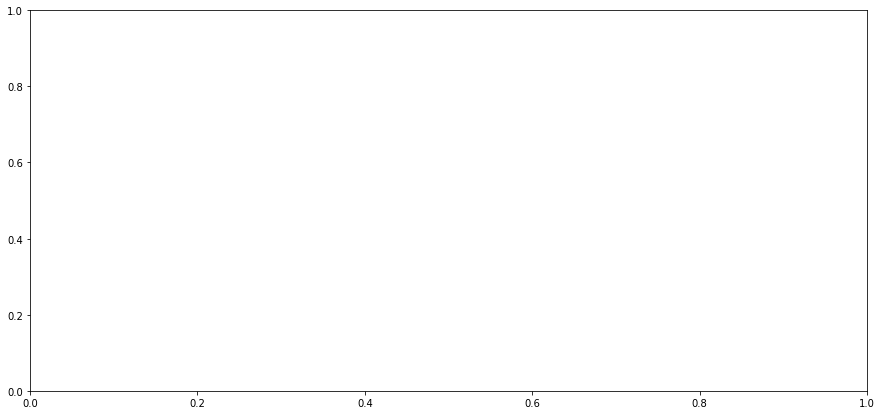

In [125]:
#population_data_male_comparison = population_data_male.groupby
fig, ax = plt.subplots(figsize=(15,7))
plt.hist2d(crime_data1_2011_2017_male_combine.loc['Arrests'], population_data_male_combine, bins=10, cmap='green')

# test = crime_data1_2011_2017_male.set_index('ethnic group')
# test
#crime_data1_2011_2017_male.columns
#population_data_male_combine.columns

Text(0.5, 1.0, 'The changes in arrests by ethnicity from 2011 to 2017 for males')

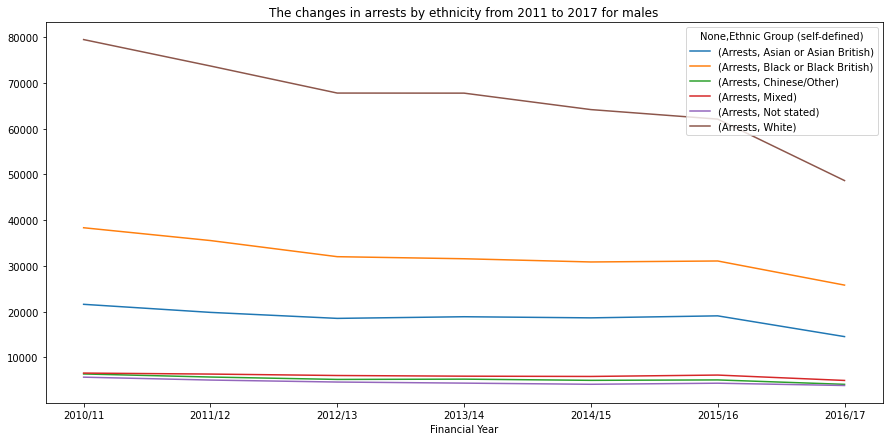

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
crime_data1_2011_2017_male.plot(ax=ax)
plt.title("The changes in arrests by ethnicity from 2011 to 2017 for males")

Text(0.5, 1.0, 'The changes in arrests by ethnicity from 2011 to 2017 for females')

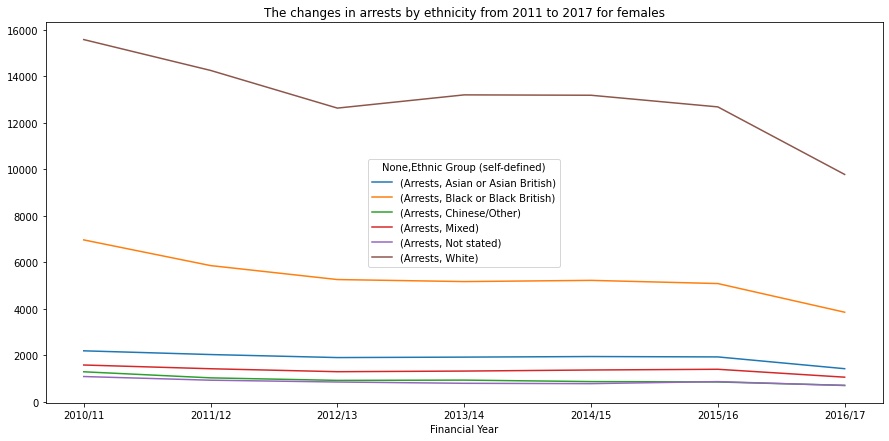

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
crime_data1_2011_2017_female.plot(ax=ax)
plt.title("The changes in arrests by ethnicity from 2011 to 2017 for females")

In [92]:
crime_data1_2011_2017_male.describe()

Arrests  ...              
Ethnic Group (self-defined) Asian or Asian British  ...         White
count                                     7.000000  ...      7.000000
mean                                  18724.142857  ...  66248.285714
std                                    2130.579063  ...   9719.897474
min                                   14533.000000  ...  48660.000000
25%                                   18577.500000  ...  63142.500000
50%                                   18880.000000  ...  67781.000000
75%                                   19452.500000  ...  70758.000000
max                                   21596.000000  ...  79496.000000

[8 rows x 6 columns]

In [99]:
crime_data1_2011_2017_male_combine.columns

MultiIndex([('Arrests', '2010/11'),
            ('Arrests', '2011/12'),
            ('Arrests', '2012/13'),
            ('Arrests', '2013/14'),
            ('Arrests', '2014/15'),
            ('Arrests', '2015/16'),
            ('Arrests', '2016/17')],
           names=[None, 'Financial Year'])

In [98]:
population_data_female_combine.columns

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [100]:
# for (col, cols) in crime_data1_2011_2017_male_combine.columns:
#   for colx in population_data_male_combine.columns:
#     proportion = (col, cols) / colx

test = 

TypeError: ignored

In [127]:
crime_data1_reason_of_arrest_male = crime_data1_2011_2017_male.groupby(['Ethnic Group (self-defined)','Reason for arrest \n(offence group)']).agg({'Arrests':'sum'}).unstack()
crime_data1_reason_of_arrest_male

Arrests  ...                            
Reason for arrest 
(offence group) 2015/16 onwards - Criminal damage and arson  ... Violence against the person
Ethnic Group (self-defined)                                                     ...                            
Asian or Asian British                                                  1333.0  ...                     32492.0
Black or Black British                                                  2488.0  ...                     52387.0
Chinese/Other                                                            386.0  ...                      7871.0
Mixed                                                                    580.0  ...                      8952.0
Not stated                                                               624.0  ...                      6484.0
White                                                                   6957.0  ...                    102464.0

[6 rows x 19 columns]

In [110]:
crime_data1_reason_of_arrest_female = crime_data1_2011_2017_female.groupby(['Ethnic Group (self-defined)','Reason for arrest \n(offence group)']).agg({'Arrests':'sum'}).unstack()
crime_data1_reason_of_arrest_female

Arrests  ...                            
Reason for arrest 
(offence group) 2015/16 onwards - Criminal damage and arson  ... Violence against the person
Ethnic Group (self-defined)                                                     ...                            
Asian or Asian British                                                   130.0  ...                      3631.0
Black or Black British                                                   513.0  ...                      9910.0
Chinese/Other                                                             85.0  ...                      1325.0
Mixed                                                                    143.0  ...                      2234.0
Not stated                                                               116.0  ...                      1396.0
White                                                                   1191.0  ...                     21030.0

[6 rows x 19 columns]

Text(0.5, 1.0, 'Reason for arrests by ethnic group for females')

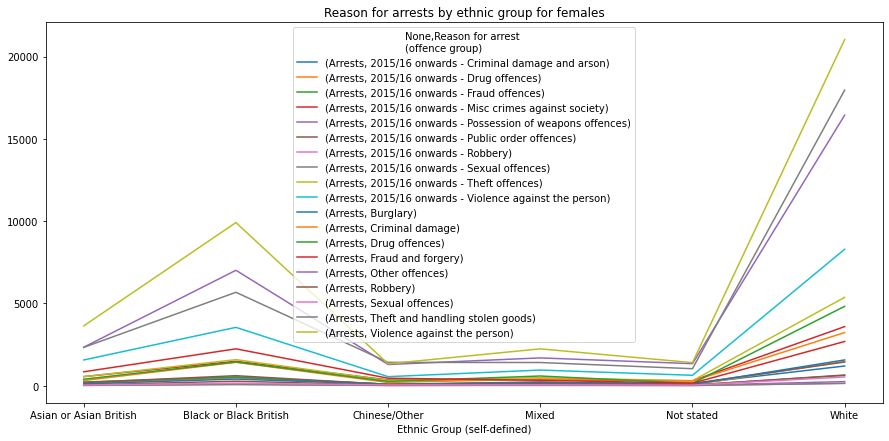

In [112]:
fig, ax = plt.subplots(figsize=(15,7))
crime_data1_reason_of_arrest_female.plot(ax=ax)
plt.title("Reason for arrests by ethnic group for females")

Text(0.5, 1.0, 'Reason for arrests by ethnic group for males')

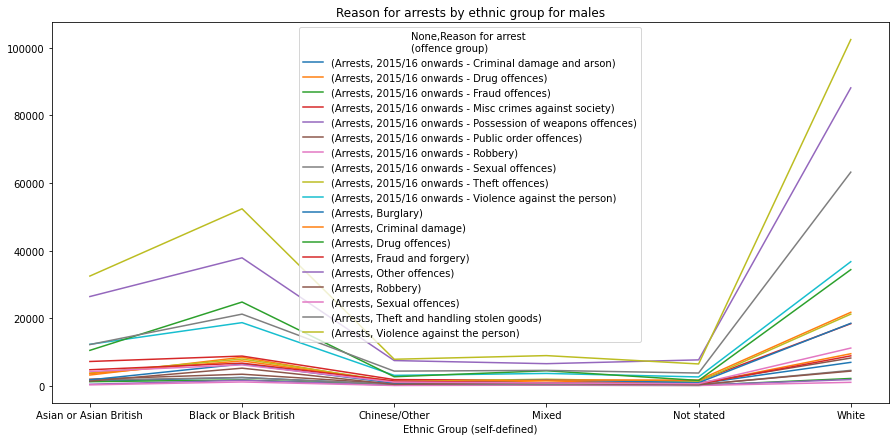

In [113]:
fig, ax = plt.subplots(figsize=(15,7))
crime_data1_reason_of_arrest_male.plot(ax=ax)
plt.title("Reason for arrests by ethnic group for males")